In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('../../data/raw/train.csv')

/var/folders/yy/dsznjxjx0mx5mb3sww95j3hc0000gn/T/ipykernel_14839/2474517263.py:1: DtypeWarning: Columns (39,40,42,55,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/raw/train.csv')


In [18]:
# 数値カラムのみを抽出
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 数値カラム間の相関行列を計算
correlation_matrix = numeric_df.corr()

# 相関行列を表示
correlation_matrix

,target_ym,money_room,building_status,building_type,building_name_ruby,unit_count,lon,lat,building_structure,total_floor_area,...,super_distance,hospital_distance,park_distance,drugstore_distance,bank_distance,shopping_street_distance,est_other_distance,parking_keiyaku,free_rent_duration,free_rent_gen_timing
target_ym,1.000000,-0.003194,-0.029582,0.001252,NaN,0.015526,0.001412,0.013922,-0.017408,-0.000230,...,0.018175,0.078497,-0.017242,-0.016230,-0.008668,-0.037671,-0.024592,0.101399,-0.000118,0.918650
money_room,-0.003194,1.000000,0.001511,0.005883,NaN,0.133589,0.068009,-0.019438,0.037466,0.138660,...,-0.131869,-0.052479,-0.143033,-0.139668,-0.105181,-0.101976,-0.120263,0.105016,0.026066,0.126155
building_status,-0.029582,0.001511,1.000000,0.004203,NaN,0.015885,0.021362,0.004356,-0.011718,-0.002200,...,-0.007334,-0.004122,-0.014537,-0.008914,-0.007119,0.010335,-0.000040,-0.010919,0.020593,-0.038092
building_type,0.001252,0.005883,0.004203,1.000000,NaN,-0.285140,0.000357,-0.006996,0.029447,-0.027946,...,0.002708,0.005712,0.000927,0.000043,0.003190,-0.007895,0.000879,-0.002828,-0.005404,-0.074873
building_name_ruby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
shopping_street_distance,-0.037671,-0.101976,0.010335,-0.007895,NaN,-0.059010,-0.035769,-0.109488,-0.006448,-0.014103,...,0.286509,0.258636,0.087968,0.359426,0.382296,1.000000,0.434058,-0.079548,0.134507,0.178117
est_other_distance,-0.024592,-0.120263,-0.000040,0.000879,NaN,-0.072852,-0.018830,0.008978,0.003467,-0.012526,...,0.425411,0.323332,0.346418,0.417256,0.402873,0.434058,1.000000,-0.036806,0.033777,0.052447
parking_keiyaku,0.101399,0.105016,-0.010919,-0.002828,NaN,0.120846,0.008829,-0.070706,0.022012,0.079223,...,0.050082,0.111101,-0.035695,-0.010029,-0.043861,-0.079548,-0.036806,1.000000,0.149495,-0.115421
free_rent_duration,-0.000118,0.026066,0.020593,-0.005404,NaN,0.053460,-0.073153,-0.184744,0.031977,-0.073570,...,-0.003880,-0.003743,0.024369,0.019440,0.016546,0.134507,0.033777,0.149495,1.000000,NaN


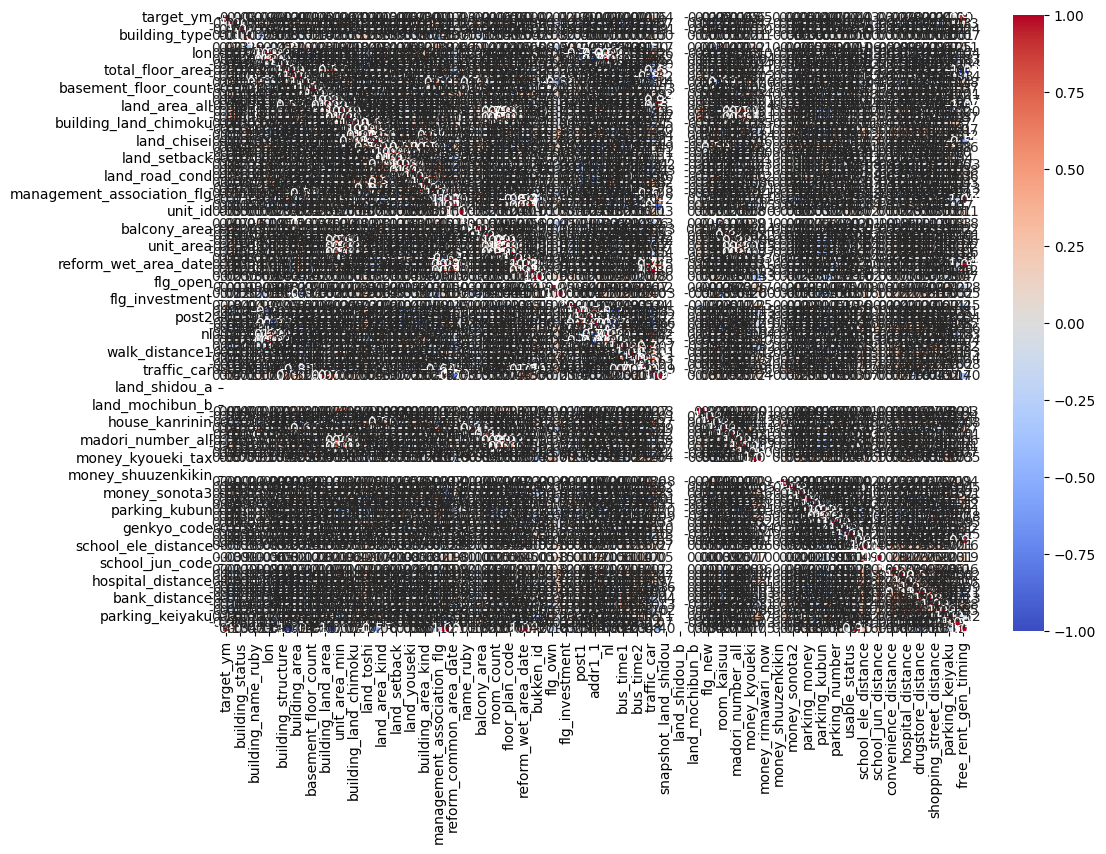

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [20]:
# 'money_room' との相関がある数値カラムのみ抽出
correlations_with_target = numeric_df.corr()['money_room'].abs().sort_values(ascending=False)

# 'money_room' との相関が強い上位20特徴量を取得
top_20_features = correlations_with_target.drop('money_room').head(20)

# 結果を表示
top_20_features

unit_area_max                 0.510367
unit_area_min                 0.379231
management_association_flg    0.305230
balcony_area                  0.219160
house_kanrinin                0.215015
floor_count                   0.207774
bus_time1                     0.196464
unit_area                     0.185310
madori_kind_all               0.175522
room_floor                    0.173974
money_sonota3                 0.156793
land_road_cond                0.156726
room_kaisuu                   0.151322
floor_plan_code               0.146181
money_kyoueki                 0.143937
park_distance                 0.143033
drugstore_distance            0.139668
total_floor_area              0.138660
unit_count                    0.133589
super_distance                0.131869
Name: money_room, dtype: float64

In [24]:
from sklearn.ensemble import RandomForestRegressor

df_selected = pd.read_csv('../../data/raw/train.csv')

# 特徴量と目的変数を分ける
# 数値カラムのみを抽出
X = df_selected.select_dtypes(include=['float64', 'int64']).drop(columns=['money_room'])
y = df_selected['money_room']


# ランダムフォレストモデルを使って特徴量の重要度を計算
model = RandomForestRegressor()
model.fit(X, y)

# 重要度が高い特徴量のみ選択
importance = model.feature_importances_
selected_features = X.columns[importance > 0.01]  # 重要度の閾値を設定

# 絞り込んだ特徴量のみのデータフレーム
df_selected = df_selected[selected_features]


/var/folders/yy/dsznjxjx0mx5mb3sww95j3hc0000gn/T/ipykernel_14839/1356845846.py:3: DtypeWarning: Columns (39,40,42,55,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df_selected = pd.read_csv('../../data/raw/train.csv')


In [28]:
df_selected.columns

Index(['lat', 'building_structure', 'floor_count', 'year_built', 'land_youto',
       'land_kenpei', 'land_youseki', 'dwelling_unit_window_angle',
       'unit_area', 'post1', 'addr1_2', 'nl', 'walk_distance2', 'house_area',
       'snapshot_window_angle', 'money_kyoueki', 'money_sonota1',
       'parking_money', 'parking_distance', 'convenience_distance',
       'super_distance'],
      dtype='object')

In [29]:
df_selected

,lat,building_structure,floor_count,year_built,land_youto,land_kenpei,land_youseki,dwelling_unit_window_angle,unit_area,post1,...,nl,walk_distance2,house_area,snapshot_window_angle,money_kyoueki,money_sonota1,parking_money,parking_distance,convenience_distance,super_distance
0,34.411514,1.0,2.0,200210.0,NaN,0.0,0.0,5.0,23.180000,598.0,...,123869683.0,NaN,23.18,5.0,3000.0,1760.0,8800.0,0.0,239.0,1280.0
1,35.741834,4.0,3.0,197612.0,NaN,NaN,NaN,5.0,47.700001,173.0,...,128659541.0,400.0,47.70,5.0,6000.0,NaN,22000.0,300.0,399.0,434.0
2,43.087834,1.0,3.0,199607.0,NaN,NaN,NaN,3.0,46.349998,65.0,...,155106911.0,1120.0,46.35,3.0,1500.0,200.0,8800.0,0.0,201.0,741.0
3,34.502380,3.0,2.0,199309.0,12.0,NaN,NaN,6.0,39.740002,720.0,...,124196872.0,700.0,39.74,6.0,2000.0,NaN,3300.0,NaN,NaN,1114.0
4,34.502380,3.0,2.0,199309.0,12.0,NaN,NaN,6.0,39.740002,720.0,...,124196970.0,3532.0,39.74,7.0,2000.0,33000.0,3300.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584502,34.713620,3.0,2.0,201202.0,NaN,NaN,NaN,3.0,57.470001,431.0,...,124963095.0,NaN,57.47,5.0,3000.0,1150.0,3300.0,0.0,283.0,327.0
584503,43.813140,1.0,2.0,201501.0,12.0,NaN,NaN,4.0,69.139999,79.0,...,157718441.0,9920.0,69.14,NaN,2000.0,500.0,3300.0,NaN,1032.0,259.0
584504,35.737079,4.0,4.0,199403.0,NaN,NaN,NaN,5.0,41.049999,116.0,...,128641810.0,400.0,41.05,NaN,5000.0,NaN,NaN,NaN,180.0,120.0
584505,43.786349,1.0,2.0,199610.0,NaN,NaN,NaN,4.0,51.840000,79.0,...,157623041.0,NaN,51.84,NaN,0.0,NaN,NaN,0.0,NaN,NaN
